In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy as smp
cmap = matplotlib.cm.get_cmap('rainbow')
plt.style.use(['science', 'notebook'])

%matplotlib ipympl


Burger Equation:

\begin{equation} {\partial u \over \partial t} + u {\partial u \over \partial x} = \nu {\partial^2 u \over \partial x^2}\end{equation}

Discretization form:


\begin{equation}u_i^{n+1} = u_i^n -  u_i^n {\Delta t \over \Delta x} {{(u_i^n - u_{i-1}^n)}} + \nu {\Delta t \over \Delta x^2}(u_{i+1}^n -2u_i^n+ u_{i-1}^n)\end{equation}





Spectral form:

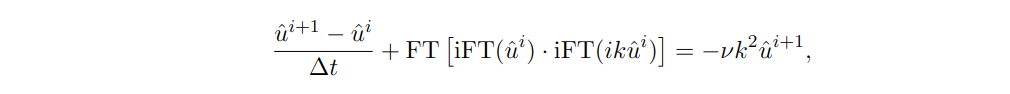

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
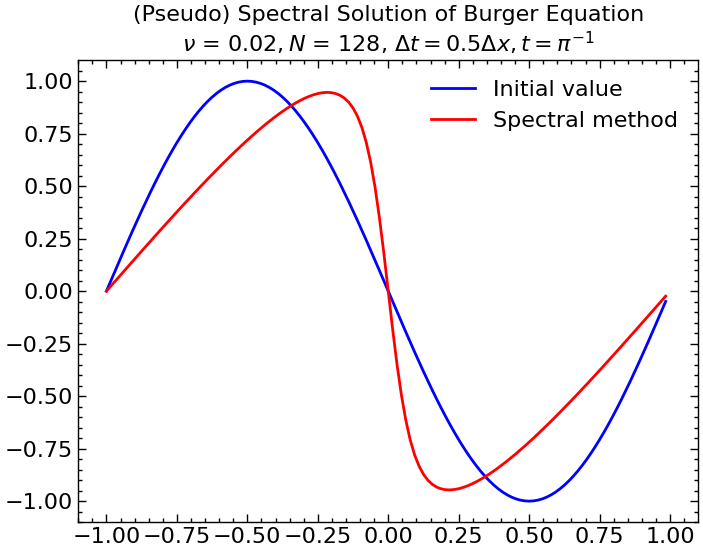

In [10]:
#Number of grids: [As given in exercise]
N = 128

# x- axis size: [As given in exercise]
L = 1

# x - azis array and dx
x, dx = np.linspace(-L, L, N, endpoint=False, retstep=True)


#Viscosity factor nu [As given in exercise]
v = 0.02 

#dt value [As given in exercise]
dt = 0.5 *dx

#time values on which loop to be performed
t= 0.
tmax=1/np.pi


#Initial value(s) for u (= -sin(pi*x)): [As given in exercise] 
u = -np.sin(np.pi*x)

#Copying u initial value for plotting
u_int = u.copy()


#K- wave number, created using fast fourier transform
k=2*np.pi*np.fft.fftfreq(N,d=dx)

#Transforming spatial array into fourier array
u_hat = np.fft.fft(u)



#Main loop 
while t<tmax:
     
        
    #Loop all values since we are using fft, boundary comditions are already periodic
    #Output of the loop is in wave domain. Will convert back into spatial
    
    u_hat[:] = (u_hat[:] - dt* np.fft.fft(np.fft.ifft(u_hat)*np.fft.ifft(1j*k*u_hat[:])))/(1+dt*v*(k*k))

    
    #time increment
    t+=dt

#Tranforming back into spatial domain    
u_sp = (np.fft.ifft(u_hat)).real

#Plotting stuff
plt.plot(x, u_int, color = "blue", label="Initial value")
plt.plot(x,u_sp, color=cmap(t/tmax), label = "Spectral method")
plt.legend()
plt.title("(Pseudo) Spectral Solution of Burger Equation\n"+ r"$\nu$ = "+str(v) + "$, N$ = "+str(N) +r", $\Delta t = 0.5 \Delta x, t = \pi^{-1}$") 
plt.xlim([-1.1*L,1.1*L])
plt.ylim([-1.1*L,1.1*L])
#plt.text(0.5, 0.5, '$t = $' +  '{:.4f}'.format(t))
plt.show()
